In [86]:
# importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [87]:
def spatial_derivative(B, dx):
    
    # 6th order central difference
    B_ = np.copy(B)
    
    # putting relative anti-symmetric ghost zone
    B_ = np.append(-np.flip(B_[1:4]), B_)
    B_ = np.append(B_, -np.flip(B_[-4:-1]))
    B_[0:3] = B_[0:3] + (2 * B[0])
    B_[-3:] = B_[-3:] + (2 * B[-1])
    
    # blank array to append the ghost zones
    # B = np.append(B, np.zeros(3))
    # B = np.append(np.zeros(3), B)
    
    
    dfdx = []
    ddfddx = []
    
    # 6th order finite difference
    for i in range(3,len(B_)-3):
        dfdx.append(((- B_[i-3]) + (9*B_[i-2]) - (45*B_[i-1]) + (45*B_[i+1]) - (9*B_[i + 2]) + (B_[i + 3])) / (60 * dx))
        ddfddx.append(((2*B_[i-3]) - (27*B_[i-2]) + (270*B_[i-1]) - (490*B_[i]) + (270*B_[i+1]) - (27*B_[i+2]) + (2*B_[i+3])) / (180 * (dx ** 2)))
    
    dfdx = np.array(dfdx)
    ddfddx = np.array(ddfddx)
    
    return dfdx, ddfddx

In [88]:
# test - disable later
B = np.array([1,2,3,4,5,6,7,8,9,10])
B_ = np.copy(B)
    
B_ = np.append(np.flip(B_[1:4]), B_)
B_ = np.append(B_, np.flip(B_[-4:-1]))

print(B_)

[ 4  3  2  1  2  3  4  5  6  7  8  9 10  9  8  7]


In [89]:
eta = 0.5
r_i = 0.1
r_f = 15
Nr = 500
T = 1.5
Nt = 3000
h = 1


Nt_ = (2 * eta * T) / (((r_f - r_i)/(Nr - 1))**2)

print("needed Nt >",Nt_)

needed Nt > 1682.3634070537362


In [90]:
eta = 0.5
r_i = 0.1
r_f = 15
Nr = 500
T = 1.5
Nt = 3000
h = 1
Save = 500 #points


# def spatial_derivative(B, dx):
#     dBdr = np.gradient(B, dx)
#     ddBddr = np.gradient(dBdr, dx)
#     return dBdr, ddBddr

def B_r0(r):
    return np.sin((np.pi * r/r_f))

def dBrdt(B, dBdr, ddBddr, r):
    return eta * (ddBddr + (dBdr/r) - B/(r**2) - (((np.pi ** 2) * B) / (4 * (h ** 2))))


# defining intial B_r
r = np.linspace(r_i, r_f, Nr)
B_r = B_r0(r)
dt = T/Nt

save_buffer = int(Nt / Save)

B_list = [B_r]

dr = r[1] - r[0]

for i in tqdm(range(1, Nt+1)):
    dBdr, ddBddr = spatial_derivative(B_r, dr)
    
    k1 = dt * dBrdt(B_r, dBdr, ddBddr, r)
    k2 = dt * dBrdt(B_r + (k1/2), dBdr, ddBddr, r)
    k3 = dt * dBrdt(B_r + (k2/2), dBdr, ddBddr, r)
    k4 = dt * dBrdt(B_r + k3, dBdr, ddBddr, r)
    
    B_r = B_r + (k1 + (2*k2) + (2*k3) + k4)/6
    
    if (i % save_buffer) == 0:
        B_list.append(B_r)

  2%|▏         | 45/3000 [00:00<00:27, 107.34it/s]

100%|██████████| 3000/3000 [00:22<00:00, 130.53it/s]


In [91]:
a = []

for i in range(10):
    # print(i)
    j = i % 2
    # print(j)
    if j == 0:
        a.append(i)
        
print(a)

[0, 2, 4, 6, 8]


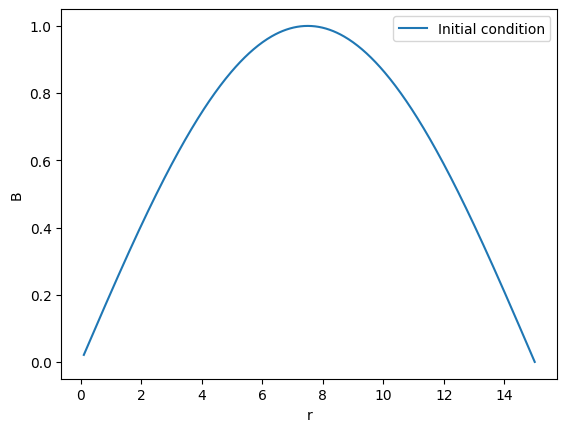

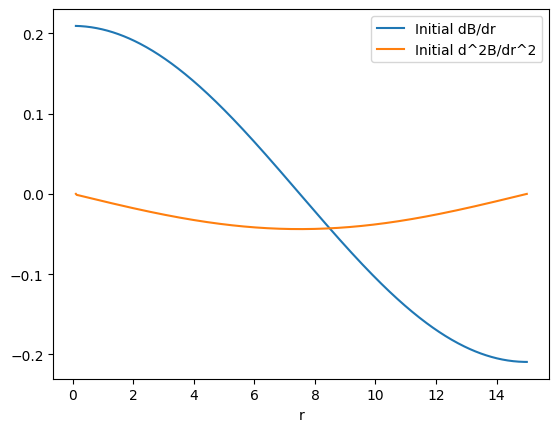

In [92]:
# plotting initial condition
plt.plot(r, B_list[0], label = 'Initial condition')
plt.xlabel('r')
plt.ylabel('B')
plt.legend()
plt.show()

dBdr, ddBddr = spatial_derivative(B_list[0], dr)
plt.plot(r, dBdr, label = 'Initial dB/dr')
plt.plot(r, ddBddr, label = 'Initial d^2B/dr^2')
plt.xlabel('r')
plt.legend()
plt.show()


In [93]:
print(B_list[-1])

[ 0.00315198  0.00409229  0.00503248  0.00597248  0.00691226  0.00785175
  0.00879094  0.00972977  0.01066821  0.01160622  0.01254377  0.01348082
  0.01441733  0.01535327  0.0162886   0.01722329  0.01815729  0.01909057
  0.0200231   0.02095483  0.02188574  0.02281578  0.02374493  0.02467313
  0.02560037  0.02652659  0.02745177  0.02837587  0.02929885  0.03022067
  0.03114131  0.03206072  0.03297887  0.03389572  0.03481124  0.03572539
  0.03663813  0.03754944  0.03845926  0.03936758  0.04027435  0.04117953
  0.04208309  0.042985    0.04388522  0.04478372  0.04568046  0.0465754
  0.04746851  0.04835975  0.0492491   0.05013651  0.05102195  0.05190538
  0.05278678  0.0536661   0.05454331  0.05541839  0.05629128  0.05716196
  0.0580304   0.05889655  0.0597604   0.06062189  0.06148101  0.0623377
  0.06319195  0.06404372  0.06489297  0.06573968  0.0665838   0.0674253
  0.06826416  0.06910033  0.06993379  0.0707645   0.07159243  0.07241755
  0.07323983  0.07405923  0.07487572  0.07568926  0.07

In [94]:
len(B_list)

501

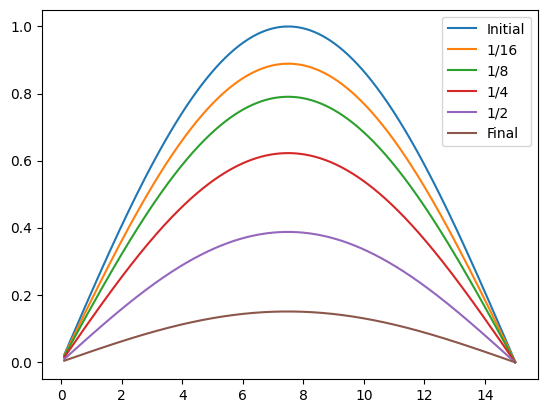

In [95]:
# plotting
fig, ax = plt.subplots()
ax.plot(r, B_list[0], label='Initial')
# ax.plot(r, B_list[1], label='1')
# ax.plot(r, B_list[2], label='2')
ax.plot(r, B_list[int(Save/16)], label='1/16')
ax.plot(r, B_list[int(Save/8)], label='1/8')
ax.plot(r, B_list[int(Save/4)], label='1/4')
ax.plot(r, B_list[int(Save/2)], label='1/2')
ax.plot(r, B_list[-1], label='Final')
ax.legend()
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

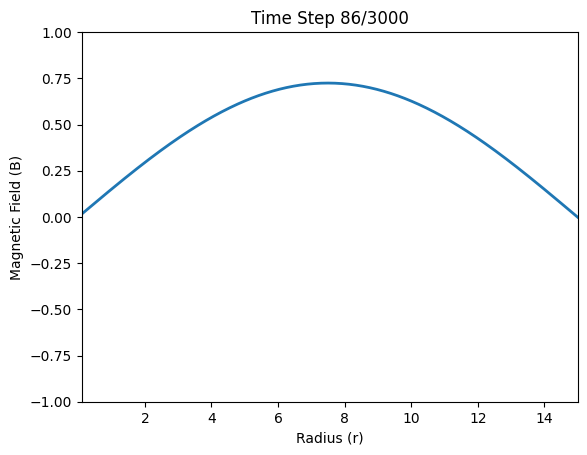

In [96]:
# animate using matplotlib
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(r_i, r_f)
ax.set_ylim(-1, 1)
ax.set_xlabel('Radius (r)')
ax.set_ylabel('Magnetic Field (B)')
ax.set_title('Evolution of Magnetic Field with Radius')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = r
    y = B_list[i]
    line.set_data(x, y)
    ax.set_title(f'Time Step {i+1}/{Nt}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=Nt, init_func=init, blit=True)
ani.save('B_r7.gif', writer='ffmpeg', fps=30)

# plt.show()


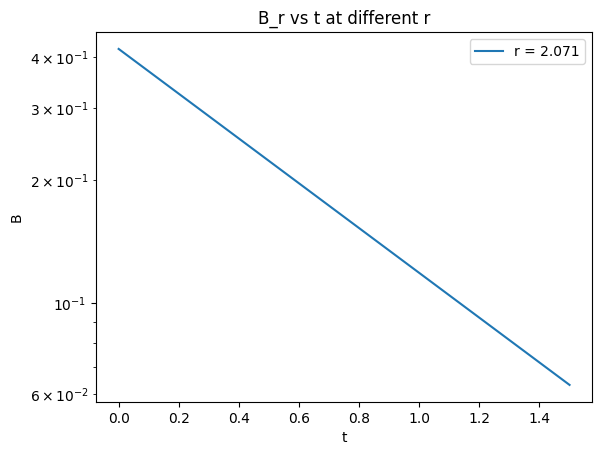

Slope: -1.260551701585941


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming B_list_t and r are defined
B_list_t = np.transpose(B_list)
t_list = np.linspace(0, T, len(B_list_t))

index = int(200 / 3)

plt.plot(t_list, B_list_t[index][1:], label=f'r = {r[index]:.3f}')
plt.xlabel('t')
plt.ylabel('B')
plt.legend()
plt.title('B_r vs t at different r')
plt.yscale('log')
plt.show()

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(t_list, np.log(B_list_t[index][1:]))
print("Slope:", slope)


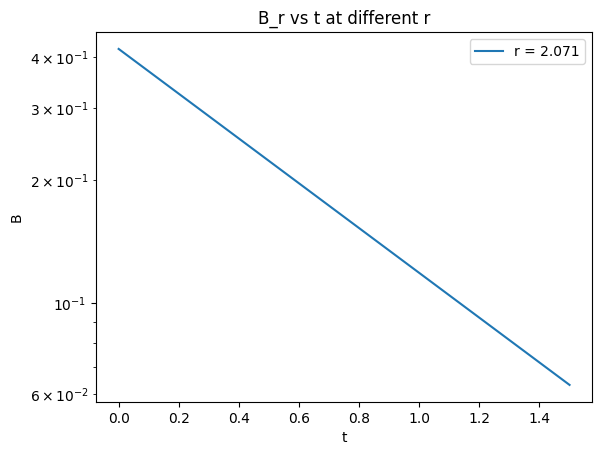

In [98]:
B_list_t = np.transpose(B_list)
t_list = np.linspace(0, T, len(B_list_t))

index = int(200 / 3)

plt.plot(t_list, B_list_t[index][1:], label = f'r = {r[index]:.3f}')
plt.xlabel('t')
plt.ylabel('B')
plt.legend()
plt.title('B_r vs t at different r')
plt.yscale('log')
plt.show()


/tmp/ipykernel_76085/2076202977.py:12: RuntimeWarning: invalid value encountered in log
  slope, _, _, _, _ = linregress(t_list, np.log(B_list_t[index][1:]))


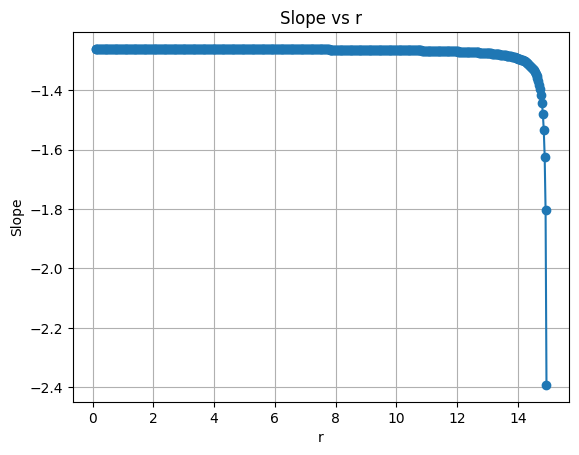

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming B_list_t, r, and T are defined
B_list_t = np.transpose(B_list)
t_list = np.linspace(0, T, len(B_list_t))

slopes = []

for index in range(len(r)):
    slope, _, _, _, _ = linregress(t_list, np.log(B_list_t[index][1:]))
    slopes.append(slope)

# Plotting code
plt.plot(r, slopes, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Slope')
plt.title('Slope vs r')
plt.grid(True)
plt.show()


100%|██████████| 3000/3000 [00:24<00:00, 121.27it/s]


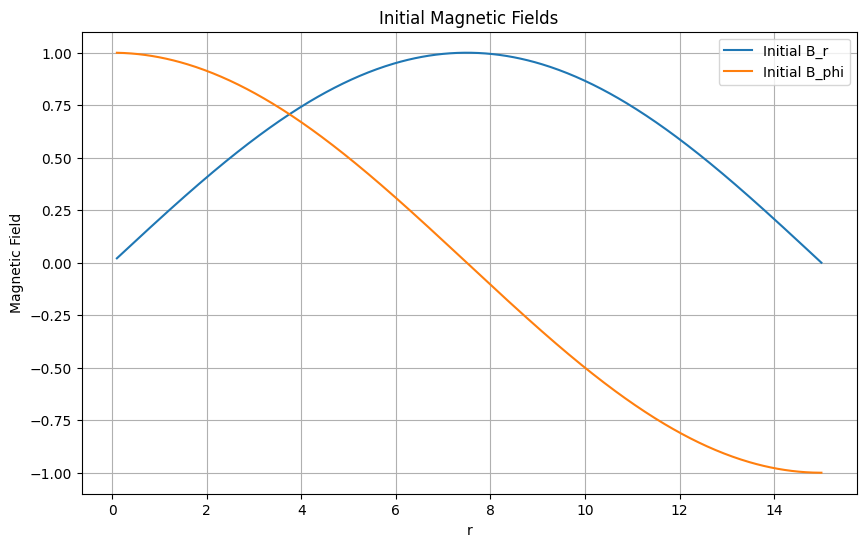

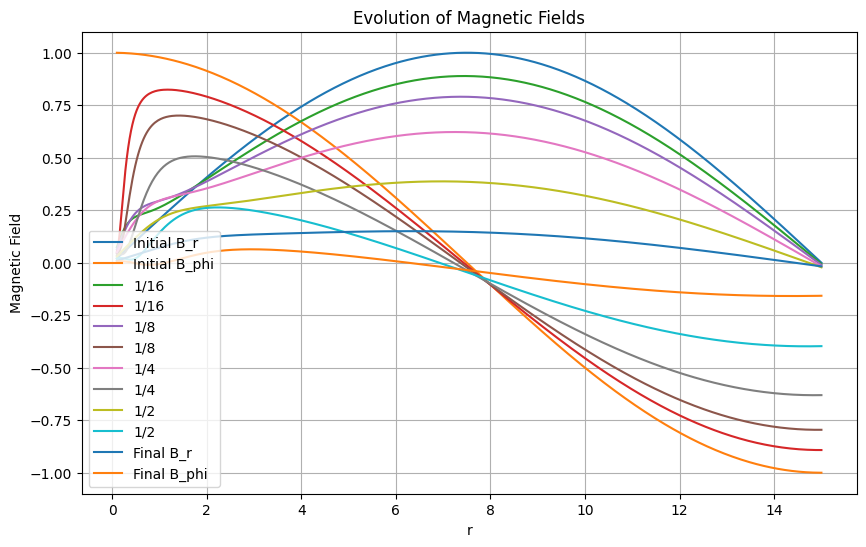

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def spatial_derivative(B, dx):
    # 6th order central difference
    B_ = np.copy(B)
    B_ = np.append(-np.flip(B_[1:4]), B_)
    B_ = np.append(B_, -np.flip(B_[-4:-1]))
    B_[0:3] = B_[0:3] + (2 * B[0])
    B_[-3:] = B_[-3:] + (2 * B[-1])
    
    dfdx = []
    ddfddx = []
    
    # 6th order finite difference
    for i in range(3,len(B_)-3):
        dfdx.append(((- B_[i-3]) + (9*B_[i-2]) - (45*B_[i-1]) + (45*B_[i+1]) - (9*B_[i + 2]) + (B_[i + 3])) / (60 * dx))
        ddfddx.append(((2*B_[i-3]) - (27*B_[i-2]) + (270*B_[i-1]) - (490*B_[i]) + (270*B_[i+1]) - (27*B_[i+2]) + (2*B_[i+3])) / (180 * (dx ** 2)))
    
    dfdx = np.array(dfdx)
    ddfddx = np.array(ddfddx)
    
    return dfdx, ddfddx

def B_r0(r):
    return np.sin(( np.pi * r/r_f))

def B_phi0(r):
    return np.cos(( np.pi * r/r_f))

def dBrdt(B_r, B_phi, dBdr, ddBddr, r):
    return eta * (ddBddr + (dBdr/r) - B_r/(r**2) - (((np.pi ** 2) * B_r) / (4 * (h ** 2)))) + B_phi / r

def dBphidt(B_r, B_phi, dBdr, ddBddr, r):
    return eta * (ddBddr + (dBdr/r) - B_phi/(r**2) - (((np.pi ** 2) * B_phi) / (4 * (h ** 2)))) - B_r / r

eta = 0.5
r_i = 0.1
r_f = 15
Nr = 500
T = 1.5
Nt = 3000
h = 1
Save = 500 #points

r = np.linspace(r_i, r_f, Nr)
B_r = B_r0(r)
B_phi = B_phi0(r)
dt = T/Nt

save_buffer = int(Nt / Save)

B_list_r = [B_r]
B_list_phi = [B_phi]

dr = r[1] - r[0]

for i in tqdm(range(1, Nt+1)):
    dBdr, ddBddr = spatial_derivative(B_r, dr)
    
    k1r = dt * dBrdt(B_r, B_phi, dBdr, ddBddr, r)
    k1phi = dt * dBphidt(B_r, B_phi, dBdr, ddBddr, r)
    
    k2r = dt * dBrdt(B_r + (k1r/2), B_phi + (k1phi/2), dBdr, ddBddr, r)
    k2phi = dt * dBphidt(B_r + (k1r/2), B_phi + (k1phi/2), dBdr, ddBddr, r)
    
    k3r = dt * dBrdt(B_r + (k2r/2), B_phi + (k2phi/2), dBdr, ddBddr, r)
    k3phi = dt * dBphidt(B_r + (k2r/2), B_phi + (k2phi/2), dBdr, ddBddr, r)
    
    k4r = dt * dBrdt(B_r + k3r, B_phi + k3phi, dBdr, ddBddr, r)
    k4phi = dt * dBphidt(B_r + k3r, B_phi + k3phi, dBdr, ddBddr, r)
    
    B_r = B_r + (k1r + (2*k2r) + (2*k3r) + k4r)/6
    B_phi = B_phi + (k1phi + (2*k2phi) + (2*k3phi) + k4phi)/6
    
    if (i % save_buffer) == 0:
        B_list_r.append(B_r)
        B_list_phi.append(B_phi)

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(r, B_list_r[0], label='Initial B_r')
plt.plot(r, B_list_phi[0], label='Initial B_phi')
plt.xlabel('r')
plt.ylabel('Magnetic Field')
plt.legend()
plt.title('Initial Magnetic Fields')
plt.grid(True)
plt.show()

# Plotting evolution
plt.figure(figsize=(10, 6))

plt.plot(r, B_list_r[0], label='Initial B_r')
plt.plot(r, B_list_phi[0], label='Initial B_phi')
plt.plot(r, B_list_r[int(Save/16)], label='1/16')
plt.plot(r, B_list_phi[int(Save/16)], label='1/16')
plt.plot(r, B_list_r[int(Save/8)], label='1/8')
plt.plot(r, B_list_phi[int(Save/8)], label='1/8')
plt.plot(r, B_list_r[int(Save/4)], label='1/4')
plt.plot(r, B_list_phi[int(Save/4)], label='1/4')
plt.plot(r, B_list_r[int(Save/2)], label='1/2')
plt.plot(r, B_list_phi[int(Save/2)], label='1/2')
plt.plot(r, B_list_r[-1], label='Final B_r')
plt.plot(r, B_list_phi[-1], label='Final B_phi')
plt.xlabel('r')
plt.ylabel('Magnetic Field')
plt.legend()
plt.title('Evolution of Magnetic Fields')
plt.grid(True)
plt.show()


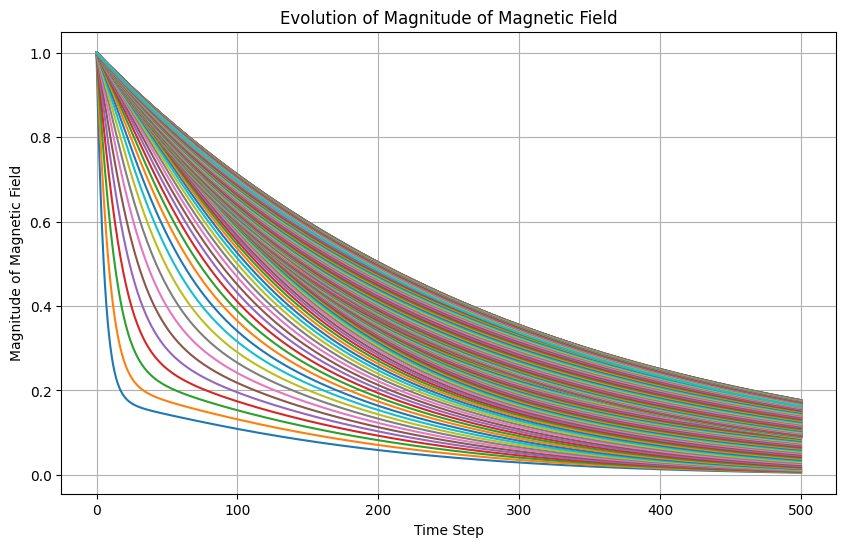

In [101]:
# Calculate magnitude of magnetic field
B_list_mag = [np.sqrt(B_r**2 + B_phi**2) for B_r, B_phi in zip(B_list_r, B_list_phi)]

# Plotting magnitude of magnetic field
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(B_list_mag)), B_list_mag)
plt.xlabel('Time Step')
plt.ylabel('Magnitude of Magnetic Field')
plt.title('Evolution of Magnitude of Magnetic Field')
plt.grid(True)
plt.show()



MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

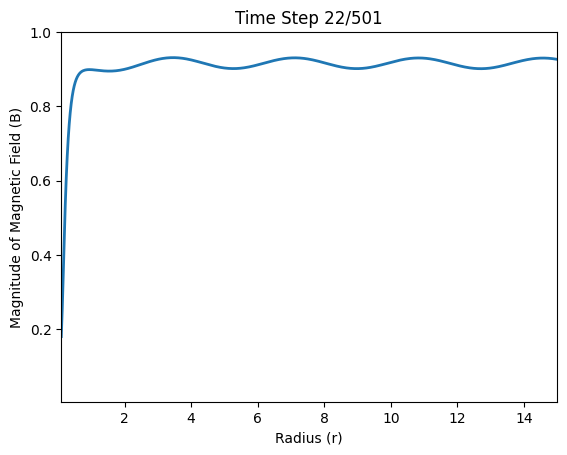

In [102]:
# Calculate magnitude of magnetic field
B_list_mag = [np.sqrt(B_r**2 + B_phi**2) for B_r, B_phi in zip(B_list_r, B_list_phi)]

# Ensure r and B_list_mag have the same length
r = r[:len(B_list_mag)]

# Plotting the animation
# animate using matplotlib
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(r_i, r_f)
ax.set_ylim(np.min(B_list_mag), np.max(B_list_mag))
ax.set_xlabel('Radius (r)')
ax.set_ylabel('Magnitude of Magnetic Field (B)')
ax.set_title('Evolution of Magnitude of Magnetic Field with Radius')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = r
    y = B_list_mag[i]
    line.set_data(x, y)
    ax.set_title(f'Time Step {i+1}/{len(B_list_mag)}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(B_list_mag), init_func=init, blit=True)
ani.save('B1.gif', writer='ffmpeg', fps=30)

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

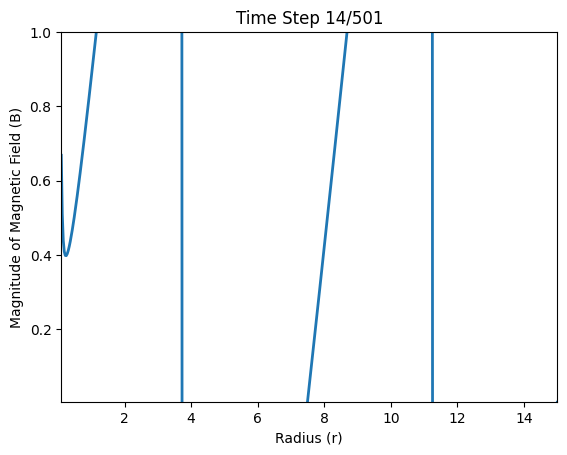

In [103]:
# Calculate pitch angle
pitch_angles = [np.arctan2(B_r, B_phi) for B_r, B_phi in zip(B_list_r, B_list_phi)]

fig, ax = plt.subplots()
ax.set_xlim(r_i, r_f)
ax.set_ylim(np.min(B_list_mag), np.max(B_list_mag))
ax.set_xlabel('Radius (r)')
ax.set_ylabel('Magnitude of Magnetic Field (B)')
ax.set_title('Evolution of Magnitude of Magnetic Field with Radius')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = r
    y = pitch_angles[i]
    line.set_data(x, y)
    ax.set_title(f'Time Step {i+1}/{len(B_list_mag)}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=len(B_list_mag), init_func=init, blit=True)
ani.save('pitch1.gif', writer='ffmpeg', fps=30)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (501,) and (500,)

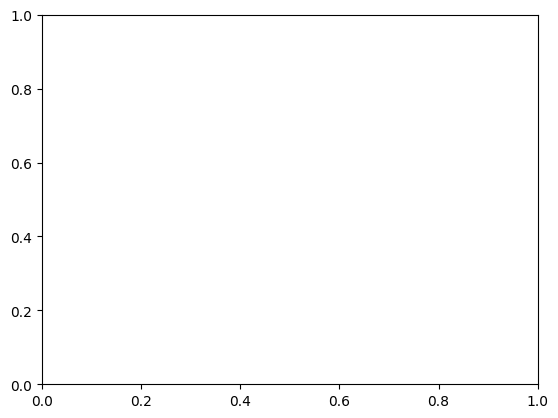

In [116]:
B_list_mag = np.transpose(B_list_mag)
t_list = np.linspace(0, T, len(B_list_mag))

index = int(200 / 3)

plt.plot(t_list, B_list_t[index][1:], label = f'r = {r[index]:.3f}')
plt.xlabel('t')
plt.ylabel('log B')
plt.legend()
plt.title('B vs t at different r')
plt.yscale('log')
plt.show()

In [113]:
# Assuming B_list_mag, T, and r are defined
B_list_mag = np.transpose(B_list_mag)
t_list = np.linspace(0, T, len(B_list_mag))

# Function to calculate slope for each value of r
def calculate_slope(B_list_mag, t_list):
    slopes = []
    for index in range(len(r)):
        # Reduce t_list length to match B_list_mag length
        t_list_trimmed = t_list[:len(B_list_mag[index][1:])]
        # Fit a linear polynomial (line) to the log-transformed data
        coefficients = np.polyfit(t_list_trimmed, np.log(B_list_mag[index][1:]), 1)
        # Extract slope
        slope = coefficients[0]
        slopes.append(slope)
    return slopes

slopes = calculate_slope(B_list_mag, t_list)
print(slopes)

decay_const=[]
for slope in slopes:
    decay_constant = -slope
    decay_const.append(decay_constant)

print(decay_const)

[-2.4571315152710644, -2.4996127951388503, -2.5399342607643955, -2.5765097019670535, -2.608061845155265, -2.633349840044113, -2.6511513225249246, -2.660360272618754, -2.6601677592696795, -2.6502832164965313, -2.631103237388073, -2.6037239076750747, -2.5697645661518136, -2.531074732363451, -2.4894441750386544, -2.446403865416365, -2.403139723859238, -2.3604938016144246, -2.3190136843459204, -2.279018233280135, -2.2406608552992893, -2.203982144309412, -2.1689501138813636, -2.135489245455109, -2.1035005774790094, -2.072875086980556, -2.043502265075383, -2.015275356826159, -1.9880943457570925, -1.9618674509583212, -1.936511670069442, -1.9119527317139426, -1.8881247011330797, -1.8649693995607013, -1.8424357408117487, -1.8204790498250079, -1.799060401887384, -1.7781460040099206, -1.7577066286648009, -1.7377171029204626, -1.71815585161689, -1.6990044907038615, -1.6802474656028583, -1.6618717290216798, -1.643866452754619, -1.6262227684347221, -1.6089335328232985, -1.5919931139242811, -1.575397

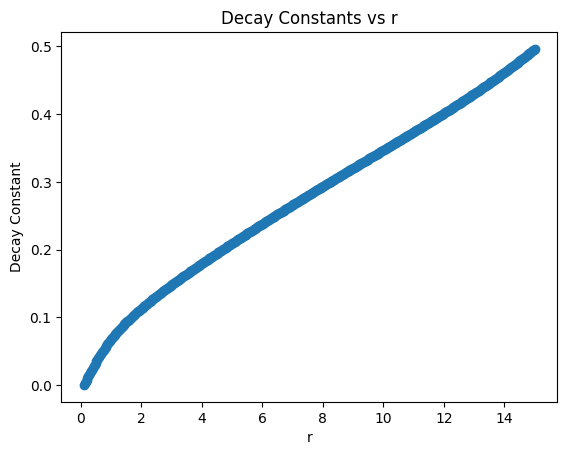

In [114]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Assuming B_list_mag, T, and r are defined
B_list_mag = np.transpose(B_list_mag)
t_list = np.linspace(0, T, len(B_list_mag))

# Function to calculate slope for each value of r
def calculate_slope(B_list_mag, t_list):
    slopes = []
    for index in range(len(r)):
        # Reduce t_list length to match B_list_mag length
        t_list_trimmed = t_list[:len(B_list_mag[index][1:])]
        # Fit a linear polynomial (line) to the log-transformed data
        coefficients = np.polyfit(t_list_trimmed, np.log(B_list_mag[index][1:]), 1)
        # Extract slope
        slope = coefficients[0]
        slopes.append(slope)
    return slopes

slopes = calculate_slope(B_list_mag, t_list)

plt.plot(r, slopes, marker='o', linestyle='-')
plt.xlabel('r')
plt.ylabel('Decay Constant')
plt.title('Decay Constants vs r')
plt.show()


Global Decay Constant: -1.4092430744800652


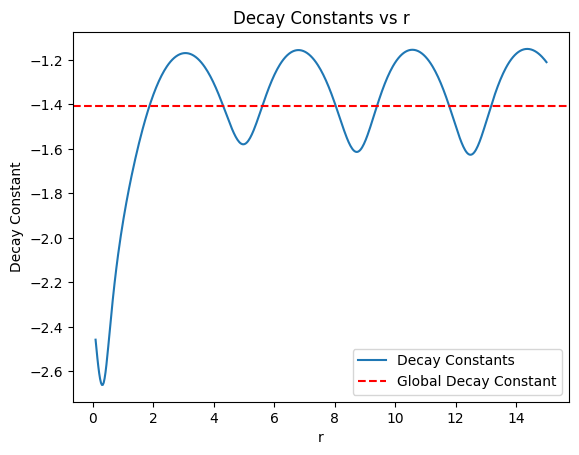

In [115]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming B_list_mag, T, and r are defined
B_list_mag = np.transpose(B_list_mag)
t_list = np.linspace(0, T, len(B_list_mag))

# Function to calculate slope for each value of r
def calculate_slope(B_list_mag, t_list):
    slopes = []
    for index in range(len(r)):
        # Reduce t_list length to match B_list_mag length
        t_list_trimmed = t_list[:len(B_list_mag[index][1:])]
        # Fit a linear polynomial (line) to the log-transformed data
        coefficients = np.polyfit(t_list_trimmed, np.log(B_list_mag[index][1:]), 1)
        # Extract slope
        slope = coefficients[0]
        slopes.append(slope)
    return slopes

slopes = calculate_slope(B_list_mag, t_list)

# Calculate global decay constant (average of all individual decay constants)
global_decay_constant = np.mean(slopes)

print("Global Decay Constant:", global_decay_constant)

# Plot individual decay constants against r
plt.plot(r, slopes, label='Decay Constants')
# Plot global decay constant as a horizontal line
plt.axhline(y=global_decay_constant, color='r', linestyle='--', label='Global Decay Constant')
plt.xlabel('r')
plt.ylabel('Decay Constant')
plt.title('Decay Constants vs r')
plt.legend()
plt.show()
